In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

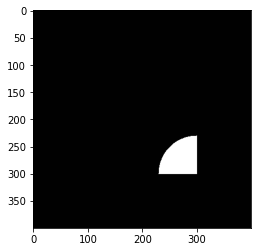

In [ ]:
img = cv2.imread('/content/anh2.png')
plt.imshow(img)

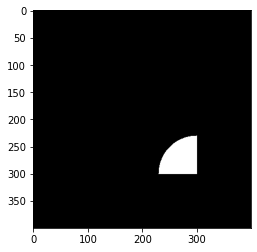

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap = 'gray')

In [ ]:
print(len(gray_img))

400


In [ ]:
print(np.min(gray_img))

1


In [ ]:
m,n = gray_img.shape

In [ ]:
size = gray_img.size
P = size
print(P)

160000


In [ ]:
def can_bang_hist(img, new_level):
  g = []
  hg = []
  tg = []
  fg = []
  Fg = []
  count = 0
  G_max = np.max(gray_img) + 1
  for l in range(0,G_max-1):
    for i in range(m):
      for j in range(n):
        if gray_img[i][j] == l:
          g.append(l)

  G = list(set(g))
  for i in range(len(G)):
    hg.append(g.count(G[i]))

  tg.append(hg[0])
  for i in range(1,len(G)):
    tg.append(hg[i] + tg[i-1])

  for i in range(len(G)):
    Fg.append(max(0,round(tg[i]/(m*n/new_level) -1)))
  
  img_phan_doan_cat_nguong = np.zeros([m, n])
  
  for l in g:
    for i in range(m):
        for j in range(n):
            if g[l] in G : 
              g[l] = Fg[G.index(g[l])]
              img_phan_doan_cat_nguong[i,j] = g[l]
  return img_phan_doan_cat_nguong

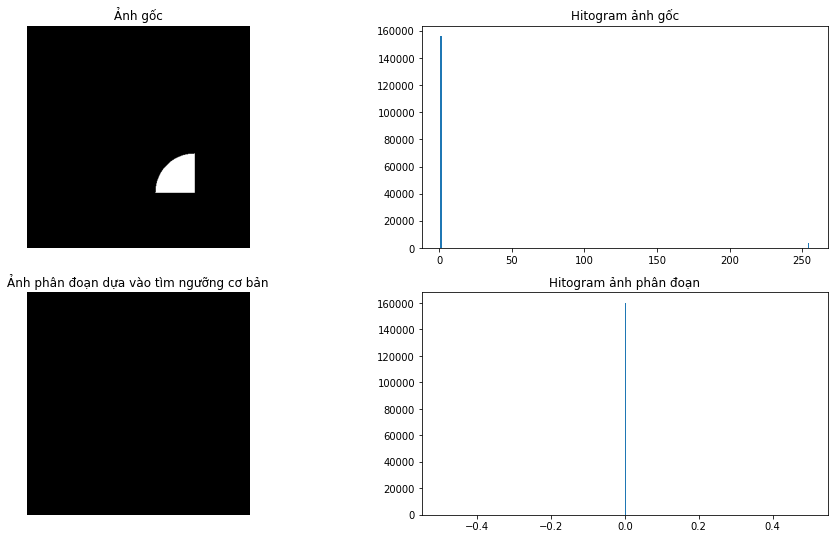

In [ ]:
if __name__ == "__main__":
    # reading image in gray scale
    img_goc = cv2.imread("/content/anh2.png",0)

    # gọi ham để phân đoạn bằng cắt ngưỡng toàn cục dựa trên ngưỡng
    img_phan_doan = can_bang_hist(img,1)

    # Vẽ và hiển thị ảnh gốc, histogram ảnh gốc và ảnh phân đoạn
    fig2 = plt.figure(figsize=(16, 9))  # Tạo vùng vẽ tỷ lệ 16:9
    #Tạo 4 vùng vẽ con
    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
    # Hiển thị ảnh gốc
    ax1.imshow(img_goc, cmap='gray')
    ax1.set_title('Ảnh gốc')
    ax1.axis('off')

    # Hiển thị histogram ảnh gốc
    ax2.hist(img_goc.flatten(),bins=256)
    ax2.set_title('Hitogram ảnh gốc')

    # Hiển thị ảnh phân đoạn
    ax3.imshow(img_phan_doan, cmap='gray')
    ax3.set_title('Ảnh phân đoạn dựa vào tìm ngưỡng cơ bản')
    ax3.axis('off')

    # Hiển thị histogram ảnh phân đoạn
    ax4.hist(img_phan_doan.flatten(), bins=256)
    ax4.set_title('Hitogram ảnh phân đoạn')
    plt.show()
